In [1]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data

flights = pd.read_csv('flights.csv', low_memory= False)
flights.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5819079 non-null  int64  
 1   MONTH                5819079 non-null  int64  
 2   DAY                  5819079 non-null  int64  
 3   DAY_OF_WEEK          5819079 non-null  int64  
 4   AIRLINE              5819079 non-null  object 
 5   FLIGHT_NUMBER        5819079 non-null  int64  
 6   TAIL_NUMBER          5804358 non-null  object 
 7   ORIGIN_AIRPORT       5819079 non-null  object 
 8   DESTINATION_AIRPORT  5819079 non-null  object 
 9   SCHEDULED_DEPARTURE  5819079 non-null  int64  
 10  DEPARTURE_TIME       5732926 non-null  float64
 11  DEPARTURE_DELAY      5732926 non-null  float64
 12  TAXI_OUT             5730032 non-null  float64
 13  WHEELS_OFF           5730032 non-null  float64
 14  SCHEDULED_TIME       5819073 non-null  float64
 15

In [3]:
# Creating a sample of 100000 rows using Pandas Library

sam = flights.iloc[:100000,:]
sam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [4]:
# Counting Number of Flights diverted from the Sample created

sam['DIVERTED'].value_counts()

0    99776
1      224
Name: DIVERTED, dtype: int64

In [5]:
# Correlation of other variables with the ARRIVAL_DELAY

flights.corr()['ARRIVAL_DELAY'][1:].sort_values(ascending = False)

ARRIVAL_DELAY          1.000000
DEPARTURE_DELAY        0.944672
AIRLINE_DELAY          0.609351
LATE_AIRCRAFT_DELAY    0.522013
WEATHER_DELAY          0.264799
AIR_SYSTEM_DELAY       0.247187
TAXI_OUT               0.227319
DEPARTURE_TIME         0.159787
WHEELS_OFF             0.155773
TAXI_IN                0.116628
SCHEDULED_DEPARTURE    0.100220
SCHEDULED_ARRIVAL      0.088824
WHEELS_ON              0.058880
ARRIVAL_TIME           0.049876
ELAPSED_TIME           0.029120
FLIGHT_NUMBER          0.018419
SECURITY_DELAY         0.009655
DAY                   -0.003097
AIR_TIME              -0.007108
DAY_OF_WEEK           -0.017027
DISTANCE              -0.025444
SCHEDULED_TIME        -0.030029
MONTH                 -0.036793
DIVERTED                    NaN
CANCELLED                   NaN
Name: ARRIVAL_DELAY, dtype: float64

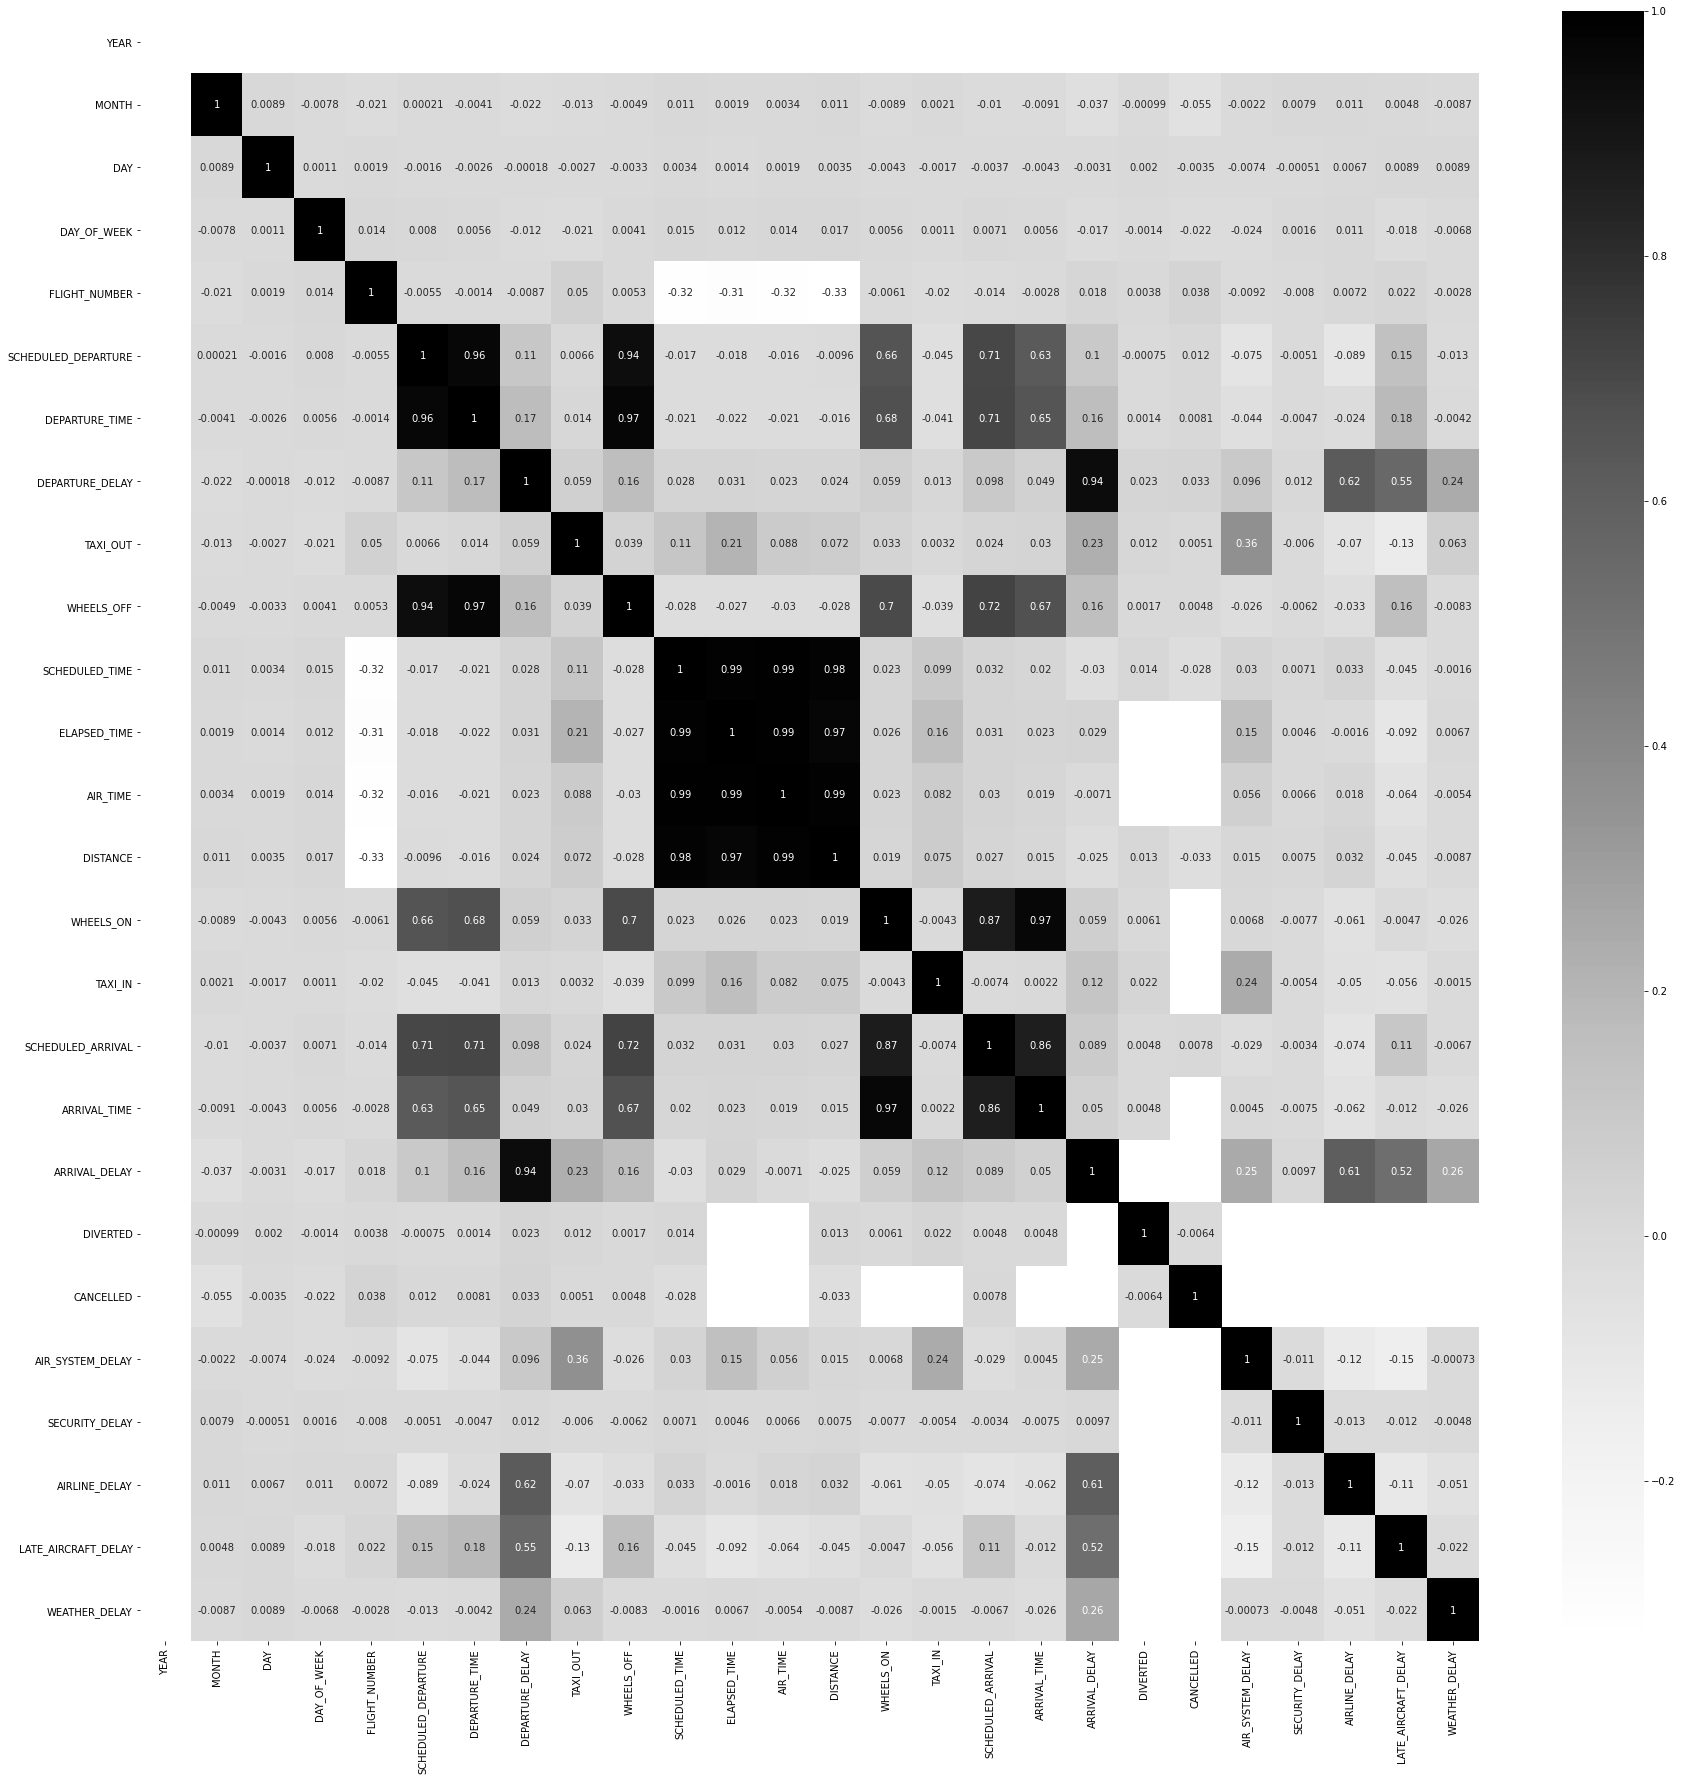

In [6]:
# Heatmap to visualize the correlation matrix

plt.figure(figsize = (30,30))
sns.heatmap(flights.corr(), cmap = 'Greys', annot = True)

In [7]:
# checking for null values

sam.isnull().sum().sort_values(ascending = False)

CANCELLATION_REASON    97611
WEATHER_DELAY          65375
AIRLINE_DELAY          65375
SECURITY_DELAY         65375
AIR_SYSTEM_DELAY       65375
LATE_AIRCRAFT_DELAY    65375
ARRIVAL_DELAY           2613
AIR_TIME                2613
ELAPSED_TIME            2613
ARRIVAL_TIME            2440
TAXI_IN                 2440
WHEELS_ON               2440
WHEELS_OFF              2371
TAXI_OUT                2371
DEPARTURE_DELAY         2298
DEPARTURE_TIME          2298
TAIL_NUMBER              167
SCHEDULED_TIME             0
CANCELLED                  0
DIVERTED                   0
DISTANCE                   0
SCHEDULED_ARRIVAL          0
SCHEDULED_DEPARTURE        0
DESTINATION_AIRPORT        0
ORIGIN_AIRPORT             0
FLIGHT_NUMBER              0
AIRLINE                    0
DAY_OF_WEEK                0
DAY                        0
MONTH                      0
YEAR                       0
dtype: int64

In [8]:
# Dropping few variables

drop_var = ['YEAR', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'DISTANCE','TAXI_OUT','DEPARTURE_TIME','SCHEDULED_TIME',
            'WHEELS_OFF','ELAPSED_TIME', 'AIR_TIME','WHEELS_ON', 'ARRIVAL_TIME','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON']

sam1 = sam.drop(drop_var, axis = 1)
sam1.shape

(100000, 15)

In [9]:
a = sam1.isnull().sum().sort_values(ascending = False)
a[a>0]

WEATHER_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
AIRLINE_DELAY          65375
SECURITY_DELAY         65375
AIR_SYSTEM_DELAY       65375
ARRIVAL_DELAY           2613
DEPARTURE_DELAY         2298
dtype: int64

In [10]:
# Computing the Null Values with the Mean Value

for i in a[a>0].index:
    sam1[i].fillna(sam1[i].mean(), inplace = True)
    
sam1.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [11]:
# Creating the Target Variable Result

sam1['result'] = sam1['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 15 else 0)

In [12]:
# Counting the number of flights which delayed 

sam1['result'].value_counts()

0    63779
1    36221
Name: result, dtype: int64

In [13]:
# Splitting the data into X and Y

x = sam1[['MONTH', 'DAY',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
        'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']].values
y = sam1['result'].values
y = y.astype('int')

In [14]:
# Splitting the data into Training and Testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [15]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [16]:
# Model Building

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion= 'gini', random_state = 42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# Model Evaluation using ROC AUC Score 

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1]))

0.9981224417926646
